# Problem Statement

A certain university wants to understand the relationship between students’ SAT scores and their GPA. Build a Simple Linear Regression model with GPA as the target variable and record the RMSE and correlation coefficient values for different models.

----- ### ----- 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
plt.rcParams['figure.figsize'] = (15,15)

In [2]:
data = pd.read_csv('SAT_GPA.csv')
data.shape

(200, 2)

We have 200 rows and 2 columns

In [3]:
data.describe()

,SAT_Scores,GPA
count,200.000000,200.000000
mean,491.810000,2.849500
std,174.893834,0.541076
min,202.000000,2.000000
25%,349.750000,2.400000
50%,480.500000,2.800000
75%,641.500000,3.400000
max,797.000000,3.900000


<AxesSubplot:>

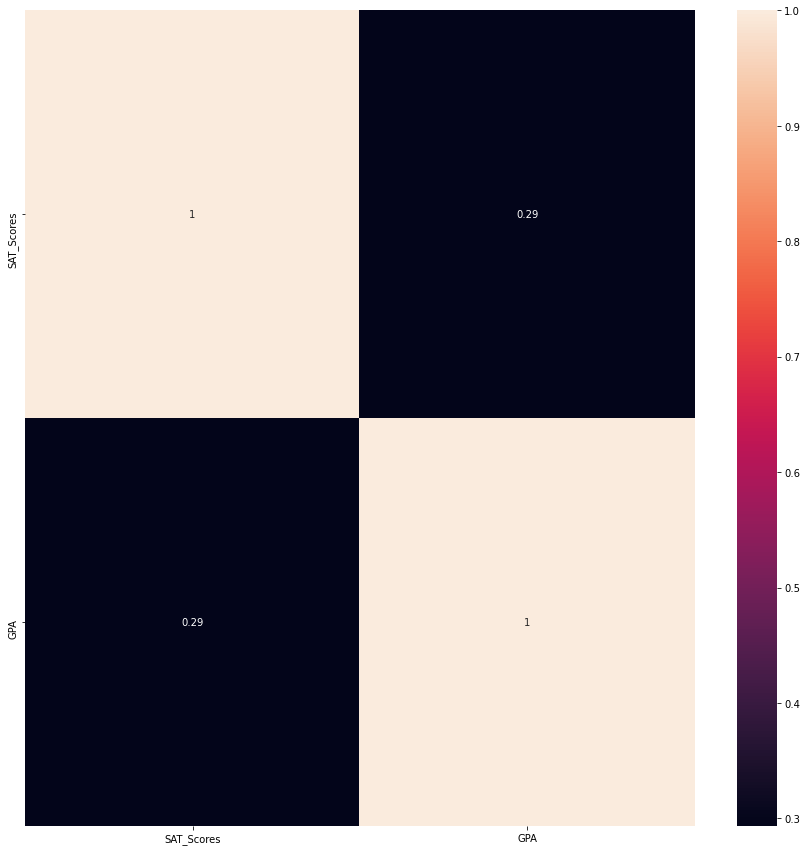

In [4]:
sns.heatmap(data.corr(), annot=True)

In [5]:
data.cov()

,SAT_Scores,GPA
SAT_Scores,30587.853166,27.777794
GPA,27.777794,0.292764


C:\Users\jaich\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SAT_Scores', ylabel='GPA'>

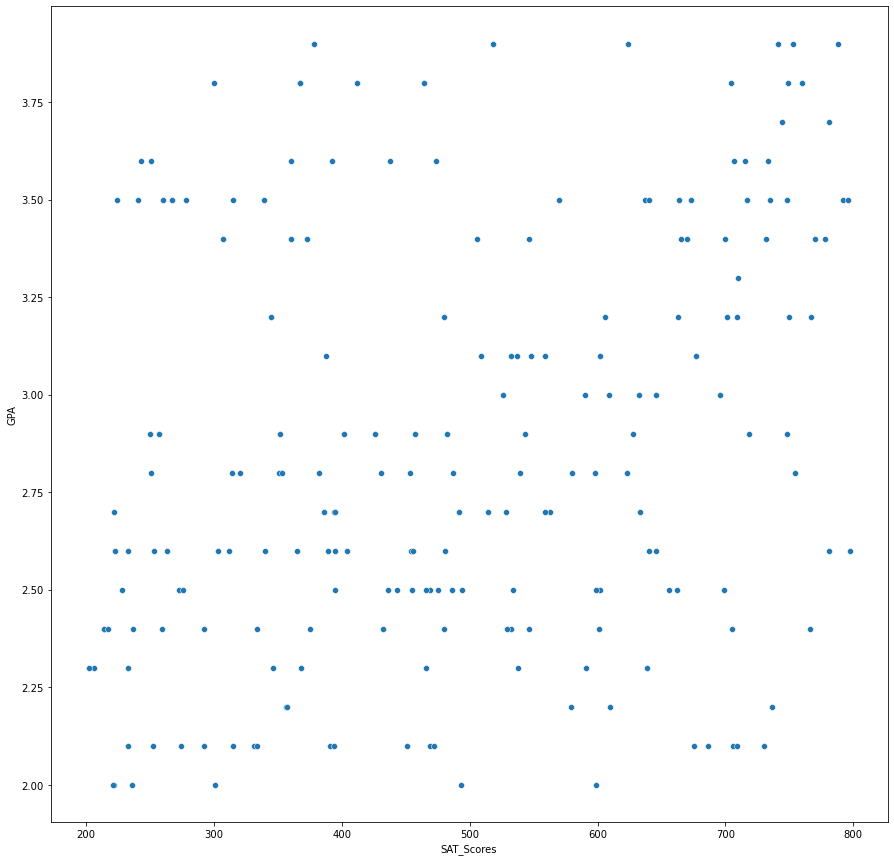

In [6]:
sns.scatterplot(data['SAT_Scores'], data['GPA'])

In [7]:
import statsmodels.formula.api as smf

## Model1 - Simple Linear Regression

In [8]:
data = data.rename(columns = {'SAT_Scores':'SAT'})
data

,SAT,GPA
0,206,2.3
1,214,2.4
2,717,3.5
3,580,2.8
4,404,2.6
...,...,...
195,509,3.1
196,466,2.5
197,673,3.5
198,741,3.9


In [9]:
model1 = smf.ols('GPA ~ SAT', data = data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     18.67
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           2.46e-05
Time:                        15:20:12   Log-Likelihood:                -151.44
No. Observations:                 200   AIC:                             306.9
Df Residuals:                     198   BIC:                             313.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4029      0.110     21.908      0.000       2.187       2.619
SAT            0.0009      0.000      4.321      0.000       0.000       0.001
==============================================================================
Omnibus:                       12.519   Durbin-Watson:                   1.323
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                7.558
Skew:                           0.317   Prob(JB):                       0.0228
Kurtosis:                       2.290   Cond. No.                     1.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
pred1 = model1.predict(pd.DataFrame(data['SAT']))
pred1

0      2.589947
1      2.597212
2      3.054002
3      2.929588
4      2.769757
         ...   
195    2.865111
196    2.826061
197    3.014044
198    3.075797
199    2.638078
Length: 200, dtype: float64

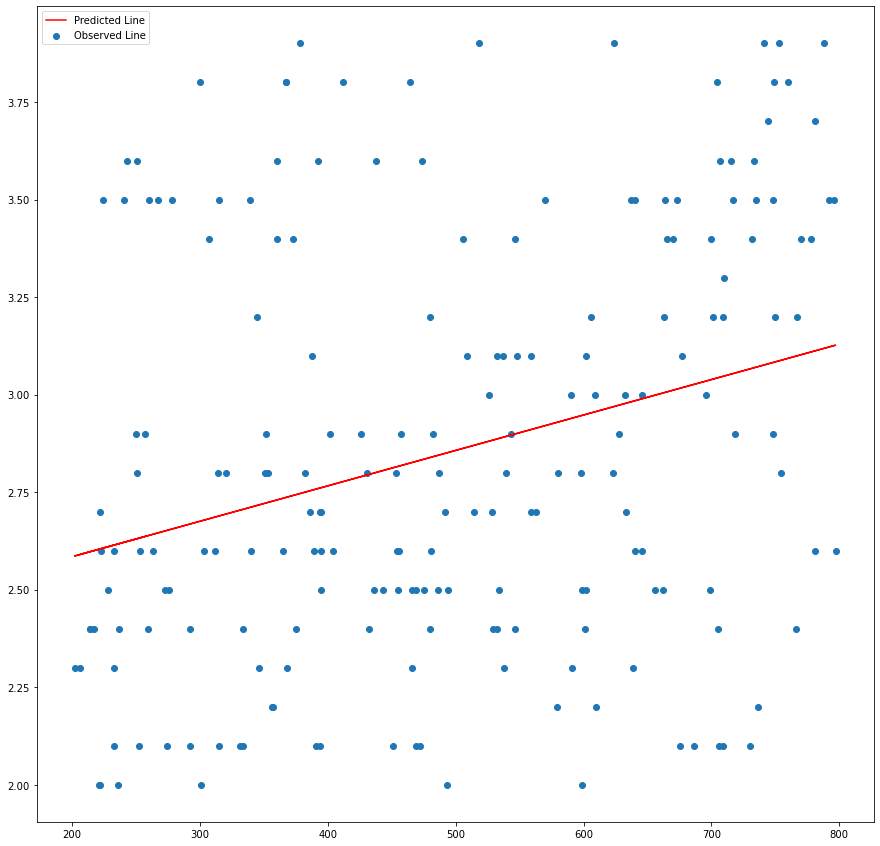

In [11]:
plt.scatter(data['SAT'],data['GPA'])
plt.plot(data['SAT'], pred1,"r")
plt.legend(['Predicted Line', 'Observed Line'])
plt.show()

In [19]:
# RMSE of Model1

res1 = data['GPA'] - pred1
res_sqrt1 = res1 * res1
mse1 = np.mean(res_sqrt1)
rmse = np.sqrt(mse1)
rmse

0.5159457227723683

## Log Transformation

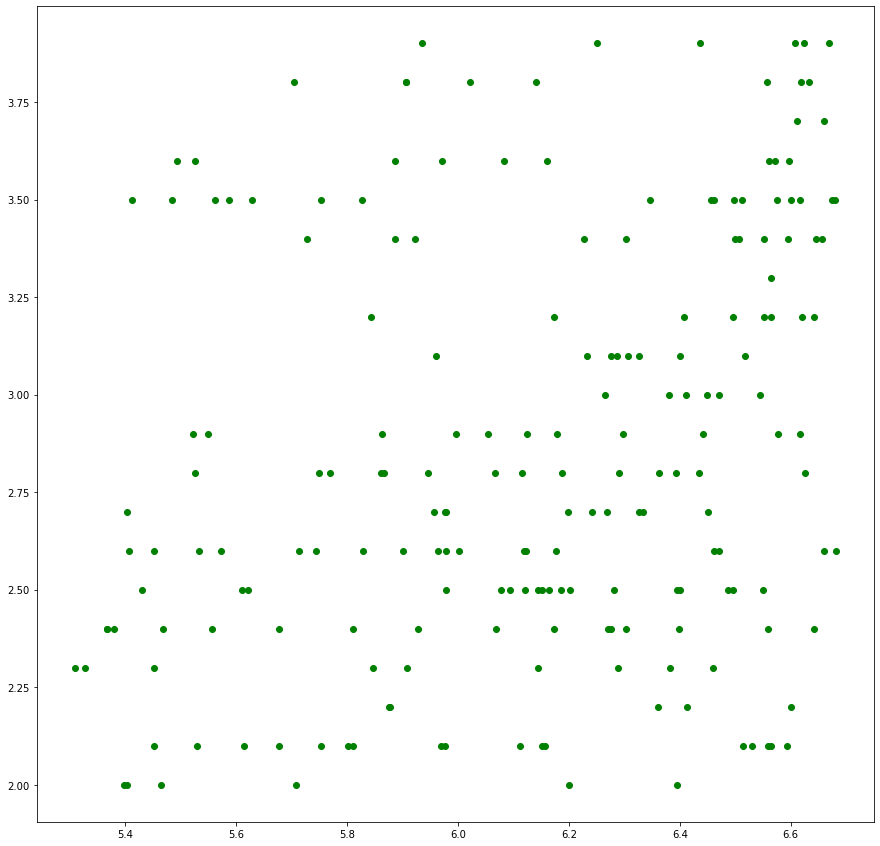

In [13]:
plt.scatter(x=np.log(data['SAT']), y = data['GPA'], color='green')

In [14]:
np.corrcoef(np.log(data['SAT']),data['GPA'])

array([[1.        , 0.27771976],
       [0.27771976, 1.        ]])

In [15]:
model2 = smf.ols('GPA ~ np.log(SAT)', data=data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     16.55
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           6.85e-05
Time:                        15:22:38   Log-Likelihood:                -152.42
No. Observations:                 200   AIC:                             308.8
Df Residuals:                     198   BIC:                             315.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4796      0.584      0.822      0.412      -0.672       1.631
np.log(SAT)     0.3868      0.095      4.068      0.000       0.199       0.574
==============================================================================
Omnibus:                       15.866   Durbin-Watson:                   1.333
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.435
Skew:                           0.320   Prob(JB):                       0.0147
Kurtosis:                       2.224   Cond. No.                         99.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
pred2 = model2.predict(pd.DataFrame(data['SAT']))

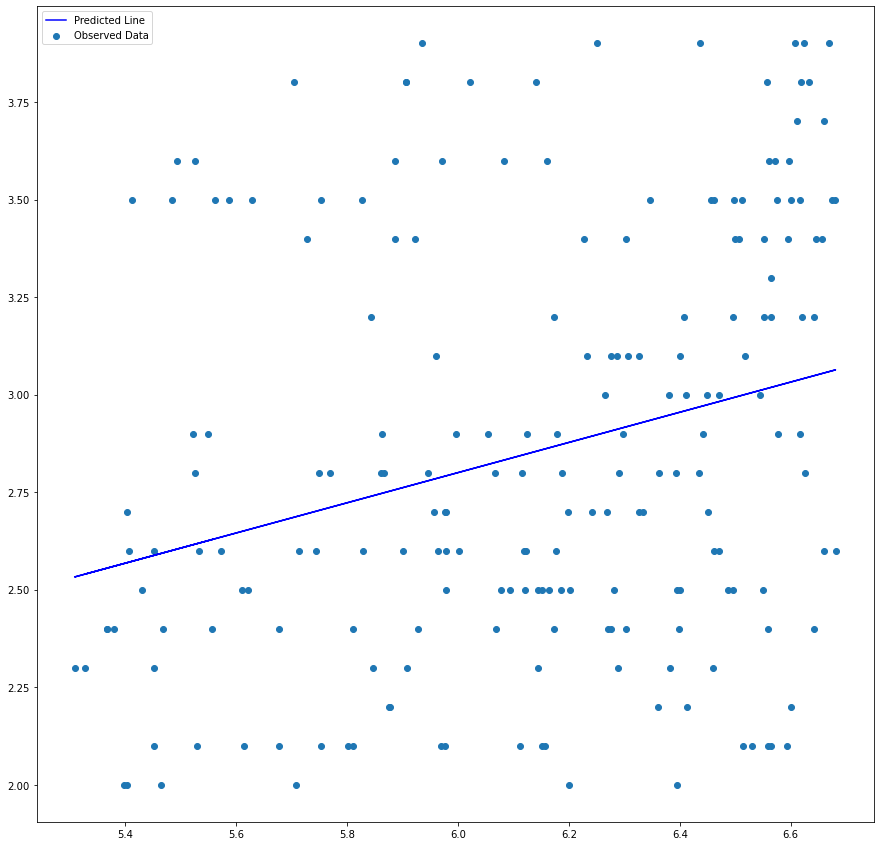

In [17]:
# Regression Line

plt.scatter(np.log(data['SAT']), data['GPA'])
plt.plot(np.log(data['SAT']), pred2, "b")
plt.legend(['Predicted Line', 'Observed Data'])
plt.show()

In [18]:
# Error Calculation

res2 = data['GPA'] - pred2
res_sqrt2 = res2 * res2
mse2 = np.mean(res_sqrt2)
rmse2 = np.sqrt(mse2)
rmse2

0.5184904101080668

## Expontential Transformation

array([[1.        , 0.29408419],
       [0.29408419, 1.        ]])

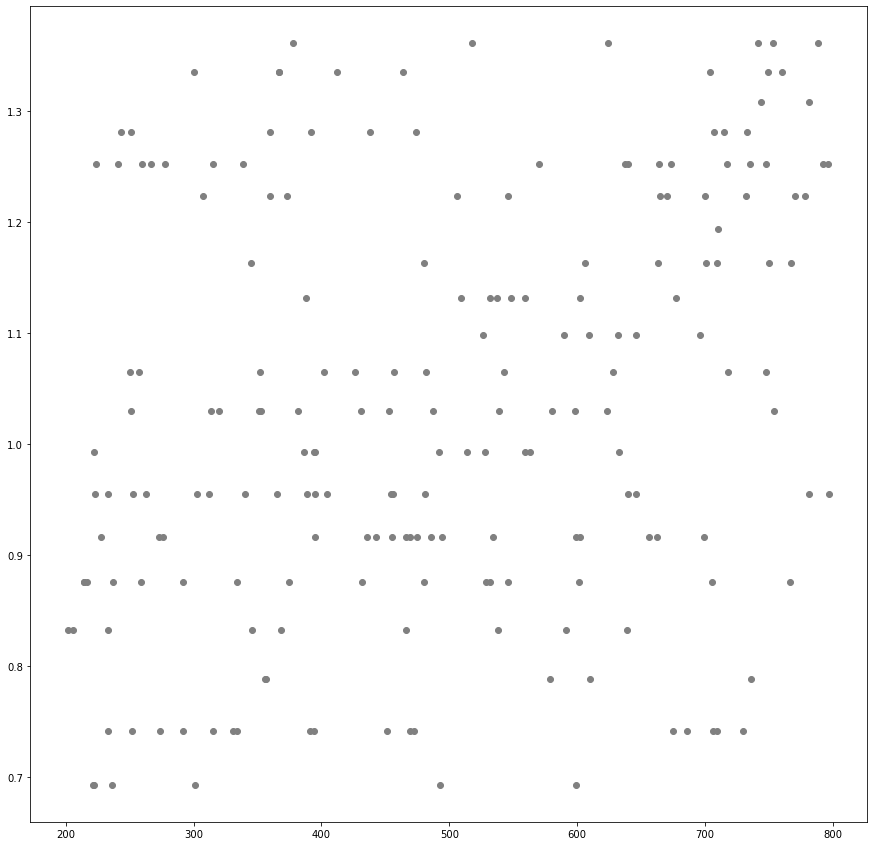

In [20]:
plt.scatter(x=data['SAT'], y = np.log(data['GPA']), color = 'grey')
np.corrcoef(data['SAT'],np.log(data['GPA']))

In [21]:
model3 = smf.ols('np.log(GPA) ~ SAT', data = data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(GPA)   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     18.75
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           2.37e-05
Time:                        15:25:42   Log-Likelihood:                 58.615
No. Observations:                 200   AIC:                            -113.2
Df Residuals:                     198   BIC:                            -106.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8727      0.038     22.745      0.000       0.797       0.948
SAT            0.0003   7.35e-05      4.330      0.000       0.000       0.000
==============================================================================
Omnibus:                       11.046   Durbin-Watson:                   1.375
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                4.816
Skew:                           0.066   Prob(JB):                       0.0900
Kurtosis:                       2.251   Cond. No.                     1.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
pred3 = model3.predict(pd.DataFrame(data['SAT']))
pred3_at = np.exp(pred3)
pred3_at

0      2.555671
1      2.562188
2      3.007152
3      2.878816
4      2.721951
         ...   
195    2.814476
196    2.776210
197    2.965323
198    3.030217
199    2.599158
Length: 200, dtype: float64

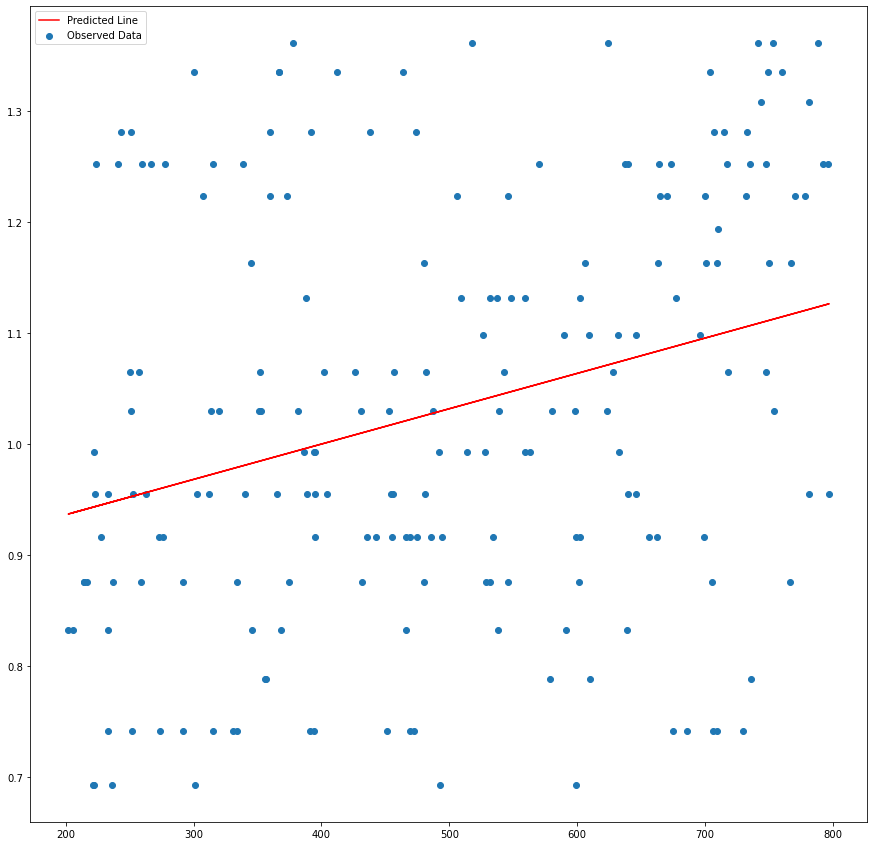

In [23]:
# Regression Line

plt.scatter(data['SAT'],np.log(data['GPA']))
plt.plot(data['SAT'], pred3, "r")
plt.legend(['Predicted Line', 'Observed Data'])
plt.show()

In [24]:
# Error Calculation
res3 = data['GPA'] - pred3_at
res_sqr3 = res3 * res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3

0.5175875893834132

## Polynomial Transformation

In [25]:
model4 = smf.ols('np.log(GPA) ~ SAT + I(SAT * SAT)',data=data).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(GPA)   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     10.23
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           5.95e-05
Time:                        15:27:28   Log-Likelihood:                 59.448
No. Observations:                 200   AIC:                            -112.9
Df Residuals:                     197   BIC:                            -103.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.0056      0.110      9.112      0.000       0.788       1.223
SAT             -0.0003      0.000     -0.607      0.545      -0.001       0.001
I(SAT * SAT)  6.142e-07   4.79e-07      1.284      0.201    -3.3e-07    1.56e-06
==============================================================================
Omnibus:                        8.598   Durbin-Watson:                   1.357
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                4.118
Skew:                           0.046   Prob(JB):                        0.128
Kurtosis:                       2.303   Cond. No.                     2.79e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.79e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
pred4 = model4.predict(pd.DataFrame(data['SAT']))
pred4_at = np.exp(pred4)
pred4_at

0      2.641946
1      2.641231
2      3.040712
3      2.837523
4      2.685642
         ...   
195    2.762567
196    2.726333
197    2.966451
198    3.085089
199    2.641076
Length: 200, dtype: float64

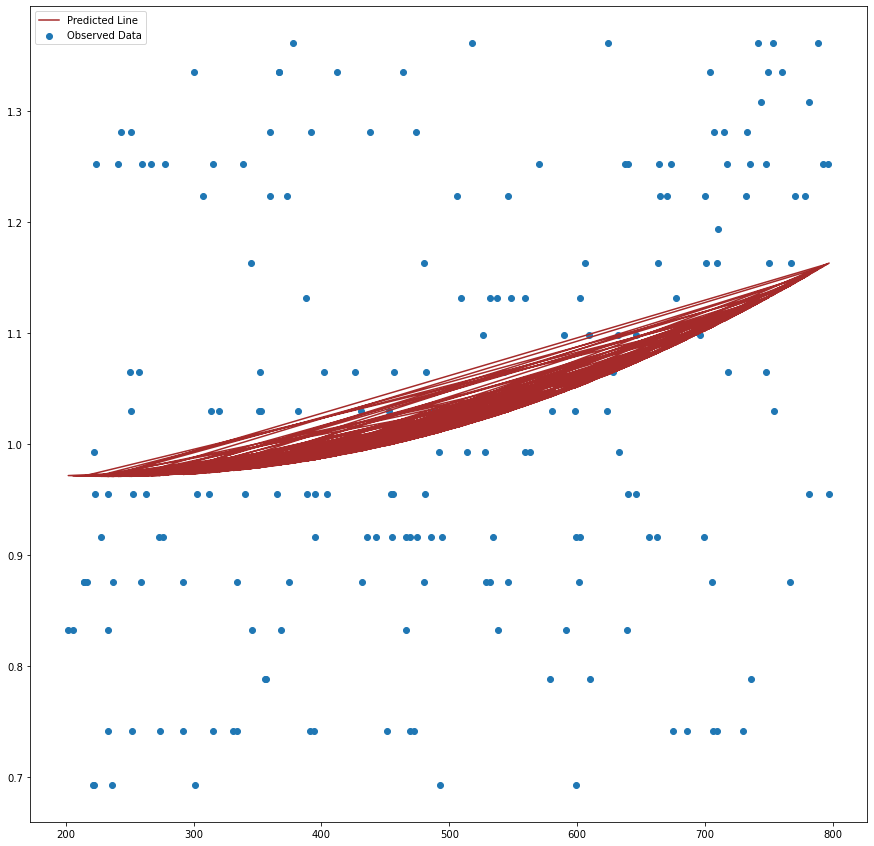

In [27]:
# Regression Line
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X = data.iloc[:, 0:1].values
X_poly = poly_reg.fit_transform(X)
y = data.iloc[:,1].values

plt.scatter(data['SAT'], np.log(data['GPA']))
plt.plot(X,pred4, color = 'brown')
plt.legend(['Predicted Line', 'Observed Data'])
plt.show()

In [28]:
# Error Calculation

res4 = data['GPA'] - pred4
res_sqrt4 = res4 * res4
mse4 = np.mean(res_sqrt4)
rmse4 = np.sqrt(mse4)
rmse4

1.8942777188587079

In [29]:
# Choose the best model using RMSE
data = {"MODEL":pd.Series(["SLR", "Log model", "Exp model", "Poly model"]), "RMSE":pd.Series([rmse, rmse2, rmse3, rmse4])}
table_rmse = pd.DataFrame(data)
table_rmse

,MODEL,RMSE
0,SLR,0.515946
1,Log model,0.518490
2,Exp model,0.517588
3,Poly model,1.894278


As per the table above SLR model is best model for the data